In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time

import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
import qiskit as qiskit
import qiskit.quantum_info as qi
from qiskit import QuantumCircuit, transpile, Aer, IBMQ

import ramsey_experiment

# Loading your IBM Quantum account(s)
IBMQ.save_account(
    '280beccbee94456a161a6cbc217e1366bc278bf60e22bd30281fa0ca5bec6e50897278ef818f3c53f6700e04b9ed32ea364195044413b7e02836a79d886b03d9',
    overwrite=True)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-research')

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
ibmqfactory.load_account:WARNING:2023-07-29 16:38:00,353: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
h = lambda n, J, z: sum([J[i] * (z[i] - 1) * (z[(i + 1) % n] - 1) for i in range(n)])


def effective_hem(size, J):
    hem = np.zeros((2 ** size, 2 ** size))
    for i in range(2 ** size):
        binary = '{0:b}'.format(i).zfill(size)
        Z = [(-1) ** int(i) for i in binary]
        hem[i, i] = h(size, J, Z)
    return hem

In [5]:
import random
from ramsey_experiment import RamseyExperiment
from ramsey_experiment import RamseyBatch

exp = []
measurements = 10
shots = np.arange(10, 2000, 100)
delay = np.linspace(0, 2 * np.pi, measurements)
repetitions = 100
for n in range(2, 6):  #qubits
    shot_list = []
    for s in shots:
        rep_list = []
        for rep in range(repetitions):
            J = [random.gauss(1, 0.1) for _ in range(n)]
            delay_list = []
            for t in delay:
                delay_list.append(RamseyExperiment(n, t, s // measurements, J=J))
            ramseyBatch = RamseyBatch(delay_list)
            rep_list.append(ramseyBatch)
        mean_dist_for_shots = np.median([rep_list[i].dist for i in range(len(rep_list))])
        shot_list.append(mean_dist_for_shots)
    exp.append(shot_list)



Failed to converge. Skipping...
Failed to converge. Skipping...
Failed to converge. Skipping...
Failed to converge. Skipping...
Failed to converge. Skipping...
Failed to converge. Skipping...


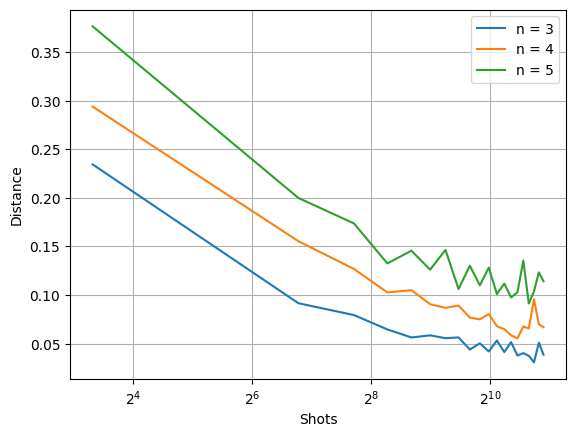

In [6]:
plt.grid()
plt.ylabel('Distance')
plt.xlabel('Shots')
#plt.ylim(0, 0.1)
for i in range(1, len(exp)):
    dist = exp[i]
    plt.plot(shots, dist, label=f'n = {str(i + 2)}')
plt.xscale('log', base=2)
plt.legend()

[1.0, 1.0, 1.0]
[0.99627599 1.0018095  1.00180396]
1.0


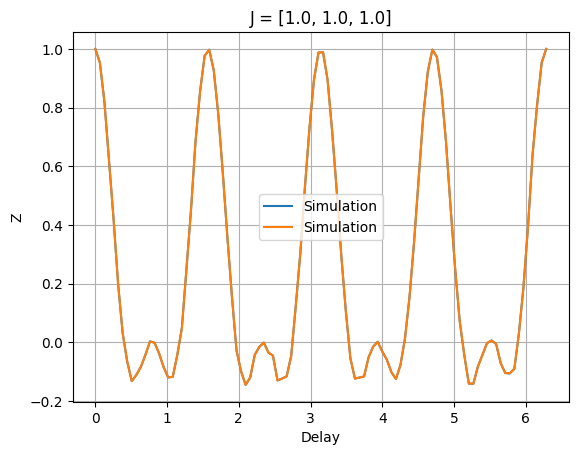

In [4]:
import random
from ramsey_experiment import RamseyExperiment
from ramsey_experiment import RamseyBatch
delay_list = []
exp = []
measurements = 100
delay = np.linspace(0,2*np.pi,100)
J = [random.gauss(1, 0) for _ in range(3)]
for t in delay:
    delay_list.append(RamseyExperiment(3, t, 6000, J=J))
ramseyBatch = RamseyBatch(delay_list)

print(J)
print(ramseyBatch.J_fit)
print(ramseyBatch.RamseyExperiments[0].z)
#print(ramseyBatch.Z)
plt.grid()
plt.ylabel('Z')
plt.xlabel('Delay')
plt.title(f'J = {J}')
plt.plot(delay,ramseyBatch.Z, label = 'Simulation')

plt.plot(delay,[rexp.z for rexp in delay_list], label = 'Simulation')
plt.legend()